# Least-Squares Regression Workbook 
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**

# Example 1
The height of a person vs femur length is given by the following data:

| femur length (cm) | height (cm) |
| :----------------: |:-----------: |
| 40	            | 163|
|41	|165|
|43	|167|
|43	|164|
|44	|168|
|44	|169|
|45	|170|
|45	|167|
|48	|170|
|51	|175|

Plot this data and then perform regression to a line and a quadratic using the standard derivation as well as the normal equations. Also use `numpy`'s `polyfit` and compare to you solutions.

Let's first get the boiler plate out of the way and import matplotlib and numpy

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np

Now place the input data in `numpy` arrays. We can enter these manually or import from a text file.

In [2]:
xi = np.array([40,41,43,43,44,44,45,45,48,51])
yi = np.array([163,165,167,164,168,169,170,167,170,175])

Now plot the data

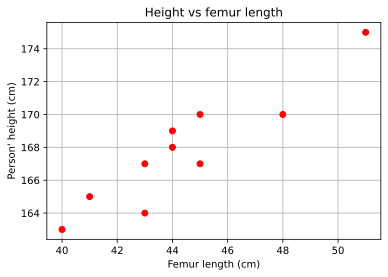

In [3]:
plt.plot(xi,yi,'ro')
plt.xlabel('Femur length (cm)')
plt.ylabel('Person\' height (cm)')
plt.title('Height vs femur length')
plt.grid()

## Regression to a straight line
Here, we regress the data to a straight line $a_0 + a_1 x$. Recall that, for regression to a straight line, we must solve the following system of equations:
\begin{equation}
\label{eq:regression-line}
\left[
\begin{array}{*{20}{c}}
N& \sum{x_i}\\
\sum{x_i} &\sum{x_i^2}
\end{array}
\right]
\left(
\begin{array}{*{20}{c}}
a_0\\
a_1
\end{array} \right)
= \left( 
\begin{array}{*{20}{c}}
\sum{y_i}\\
\sum {x_i y_i}
\end{array} 
\right)
\end{equation}

first build the coefficient matrix as a list of lists [ [a,b], [c,d]]. We will use `numpy.sum` to compute the various summations in the system \eqref{eq:regression-line}.

In [4]:
N = len(xi)
A = np.array([[N, np.sum(xi)],
                 [np.sum(xi), np.sum(xi**2)]])

next, construct the right-hand-side using a 1D numpy array

In [5]:
b = np.array([np.sum(yi), np.sum(xi*yi)])

now find the solution of $[\mathbf{A}]\mathbf{a} = \mathbf{b}$, where $a = (a_0, a_1)$ are the coefficients of the regressed line. Use `numpy`'s built-in linear solver.

In [6]:
sol = np.linalg.solve(A,b)
# print the solution. Note that in this case, the solution should contain two values, a0 and a1, respectively.
print(sol)

[123.20779221   1.004329  ]


The variable `sol` contains the solution of the system of equations. It is a list of two entries corresponding to the coefficients $a_0$ and $a_1$ of the regressed line.

We can now plot the line, $a_0 + a_1 x$ that we just fitted into the data

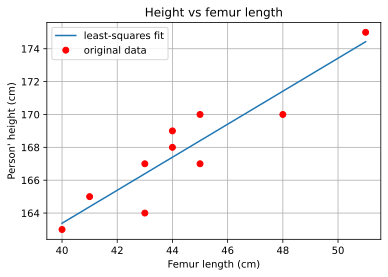

In [7]:
# first get the coefficients a0 and a1 from the variable sol
a0 = sol[0]
a1 = sol[1]

# construct a function f(x) for the regressed line
y_line = lambda x: a0 + a1*x

# now plot the regressed line as a function of the input data xi
plt.plot(xi, y_line(xi), label='least-squares fit')
# plot the original data
plt.plot(xi, yi,'ro', label='original data')
plt.xlabel('Femur length (cm)')
plt.ylabel('Person\' height (cm)')
plt.title('Height vs femur length')
plt.legend()
plt.grid()

## Standard Error

The standard error of the model quantifies the spread of the data around the regression curve. It is given by
\begin{equation}
S_{y/x} = \sqrt{\frac{S_r}{n-2}} = \sqrt{\frac{\sum{(y_i - f_i)^2}}{n-2}}
\end{equation}

In [8]:
ybar = np.average(yi)
print(ybar)
fi = y_line(xi)
stdev = np.sqrt(np.sum((yi - ybar)**2)/(N-1))
print(stdev - ybar)
Sr = np.sum((yi-fi)**2)
Syx = np.sqrt(Sr/(N-2))
print(Syx)

167.8
-164.3103327124527
1.4317065166379392


### R2 Value

The $R^2$ value can be computed as:
\begin{equation}R^2 = 1 - \frac{\sum{(y_i - f_i)^2}}{\sum{(y_i - \bar{y})^2}}\end{equation}
where
\begin{equation}
\bar{y} = \frac{1}{N}\sum{y_i}
\end{equation}

In [9]:
ybar = np.average(yi)
fi = y_line(xi)
rsq = 1 - np.sum( (yi - fi)**2 )/np.sum( (yi - ybar)**2 )
print(rsq)

0.8503807627895225


To enable quick calculation of the R2 value for other functions, let's declare a function that computes the R2 value for an arbitrary model fit.

In [10]:
def rsquared(xi,yi,ymodel):
    '''
    xi: vector of length n representing the known x values.
    yi: vector of length n representing the known y values that correspond to xi.
    ymodel: a python function (of x only) that can be evaluated at xi and represents a model fit of 
            the data (e.g. a regressed curve).
    '''
    ybar = np.average(yi)
    fi = ymodel(xi)
    result = 1 - np.sum( (yi - fi)**2 )/np.sum( (yi - ybar)**2 )
    return result

In [11]:
rsq = rsquared(xi,yi,y_line)
print(rsq)

0.8503807627895225


## Regression to a quadratic
Here, we regress the data to a quadratic polynomial $a_0 + a_1 x + a_2 x^2$. Recall that, for regression to a quadratic, we must solve the following system of equations:
\begin{equation}
\label{eq:regression-line}
\left[
\begin{array}{*{20}{c}}
N & \sum{x_i} & \sum{x_i^2}\\
\sum{x_i} &\sum{x_i^2} & \sum{x_i^3} \\
\sum{x_i^2} & \sum{x_i^3} & \sum{x_i^4}
\end{array}
\right]
\left(
\begin{array}{*{20}{c}}
a_0\\
a_1 \\
a_2
\end{array} \right)
= \left( 
\begin{array}{*{20}{c}}
\sum{y_i}\\
\sum {x_i y_i}\\
\sum {x_i^2 y_i}
\end{array} 
\right)
\end{equation}

In [12]:
A = np.array([[len(xi),    np.sum(xi)  , np.sum(xi**2)  ],
                 [np.sum(xi), np.sum(xi**2), np.sum(xi**3)],
                 [np.sum(xi**2), np.sum(xi**3), np.sum(xi**4)] ])
b = np.array([np.sum(yi), np.sum(xi*yi), np.sum(xi*xi*yi)])
print(A,b)

[[      10      444    19806]
 [     444    19806   887796]
 [   19806   887796 39994422]] [   1678   74596 3331896]


In [13]:
sol = np.linalg.solve(A,b)
print(sol)

[1.28368173e+02 7.76379556e-01 2.50458155e-03]


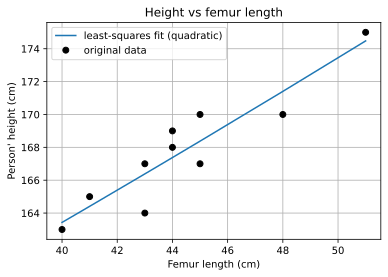

In [14]:
a0 = sol[0]
a1 = sol[1]
a2 = sol[2]
y_quad = lambda x: a0 + a1*x + a2*x**2
# now plot the regressed line as a function of the input data xi
plt.plot(xi, y_quad(xi), label='least-squares fit (quadratic)')
# plot the original data
plt.plot(xi, yi,'ko', label='original data')
plt.xlabel('Femur length (cm)')
plt.ylabel('Person\' height (cm)')
plt.title('Height vs femur length')
plt.legend()
plt.grid()

Let's now compute the R2 value for the quadratic fit

In [15]:
rsq = rsquared(xi,yi,y_quad)
print(rsq)

0.8504537705463826


This value of 85% is not much different than the one we got with a straight line fit. The data is very likely to be distributed linearly.

## Using the normal equations
Fit a straight line to the data using the normal equations

In [16]:
A = np.array([np.ones(len(xi)),xi]).T
print(A)
ATA =  A.T @ A
sol = np.linalg.solve(ATA,A.T@yi)
print(sol)

[[ 1. 40.]
 [ 1. 41.]
 [ 1. 43.]
 [ 1. 43.]
 [ 1. 44.]
 [ 1. 44.]
 [ 1. 45.]
 [ 1. 45.]
 [ 1. 48.]
 [ 1. 51.]]
[123.20779221   1.004329  ]


For a quadratic fit using the normal equations

In [17]:
A = np.array([np.ones(len(xi)),xi,xi**2]).T
ATA =  A.T @ A
sol = np.linalg.solve(ATA,A.T@yi)
print(sol)

[1.28368173e+02 7.76379556e-01 2.50458155e-03]


## Using Numpy's Polyfit
It is possible to repeat the previous analysis using `numpy's` `polyfit` function. Let's try it out and compare to our results

We first compare a straight line fit

In [18]:
coefs = np.polyfit(xi,yi,1)
print(coefs)

[  1.004329   123.20779221]


Indeed, the coefficients are the same as the ones we obtained from our straight-line fit. Polyfit returns the coefs sorted in reverse order.

To use the data returned by `polyfit`, we can construct a polynomial using `poly1d` and simply pass the coefficients returned by `polyfit`

In [19]:
p = np.poly1d(coefs)

no, simply call `p` on any value, say `p(43)`

In [20]:
print(p(43))

166.39393939393938


We can also plot the fit

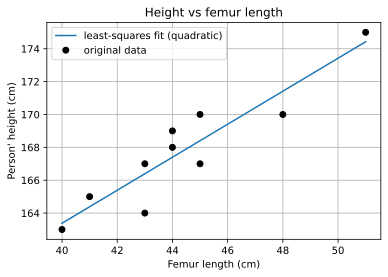

In [21]:
# now plot the regressed line as a function of the input data xi
plt.plot(xi, p(xi), label='least-squares fit (quadratic)')
# plot the original data
plt.plot(xi, yi,'ko', label='original data')
plt.xlabel('Femur length (cm)')
plt.ylabel('Person\' height (cm)')
plt.title('Height vs femur length')
plt.legend()
plt.grid()

We can do the same for the quadratic fit - simply change the degree of the polynomial in `polyfit`

In [22]:
coefs = np.polyfit(xi,yi,2)
pquad = np.poly1d(coefs)
print(pquad(43))

166.383465689269


## Using numpy's Least Squares

In [23]:
np.linalg.lstsq(A,yi,rcond=None)

(array([1.28368173e+02, 7.76379556e-01, 2.50458155e-03]),
 array([16.39026675]),
 3,
 array([6.32567302e+03, 9.94238708e+00, 1.72620823e-02]))

In [24]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()